#HW1 - Data Exploration and Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [2]:
!rm *.csv

from google.colab import files
print("Please load the raw csv data")
uploadedData = files.upload()
filename = list(uploadedData)[0]

Please load the raw csv data


Saving virus_data.csv to virus_data.csv


In [3]:
dataset = pd.read_csv(filename)

In [4]:
dataset.shape

(3000, 29)

# How to download from Colab?

In [5]:
# from google.colab import files
# outputPath = "saved_file.csv"
# dataset.to_csv(outputPath)
# files.download(outputPath) 

# <u>**Q2**</u>

Print the `value_counts` of the `num_of_siblings` feature (see Tutorial 01). Add the obtained output to your report. Moreover, describe in one short sentence what you think this feature refers to in the real world. State what type (continuous, categorical, ordinal, or neither) you believe this feature to be. Explain.

Note: Ordinal variables are categorical with a natural order (e.g., year of birth).
Remember to clearly write the number of the question next to your answer.

In [6]:
dataset.num_of_siblings.value_counts()

2.0    754
1.0    707
3.0    554
0.0    400
4.0    272
5.0    120
6.0     29
7.0      7
8.0      2
9.0      1
Name: num_of_siblings, dtype: int64

# <u>**Q3**</u>

In your report, write a table describing each feature.
The columns must be:</br>
a. Feature name: the name of the feature as it is written in the dataset.</br>
b. Description: a short description (1 short sentence) of the feature’s meaning in the real world.</br>
c. Type: Continuous, Categorical, Ordinal, or Other.

**NOTE**: do not to include the target columns (“covid”, “spread” and “risk”).

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             3000 non-null   int64  
 1   age                    2830 non-null   float64
 2   sex                    2838 non-null   object 
 3   weight                 2863 non-null   float64
 4   blood_type             2855 non-null   object 
 5   address                2846 non-null   object 
 6   current_location       2860 non-null   object 
 7   job                    744 non-null    object 
 8   num_of_siblings        2846 non-null   float64
 9   happiness_score        2856 non-null   float64
 10  household_income       2842 non-null   float64
 11  pcr_date               2850 non-null   object 
 12  symptoms               1555 non-null   object 
 13  conversations_per_day  2855 non-null   float64
 14  sugar_levels           2830 non-null   float64
 15  spor

In [8]:
# dataset.head(10)
dataset.sport_activity.value_counts()

1.0    1053
0.0     760
2.0     578
3.0     288
4.0     104
5.0      79
Name: sport_activity, dtype: int64

# <u>**Q5**</u>

Split the data into training and test sets. Take 80% of the data as the training set and the remaining 20% as the test set. As the `random_state`, use the sum of the last digit of your i.d and your partner’s id.</br>
The random state will ensure that you get the same split every time. Why is it important that we use the exact same split for all our analyses?</br>

Note: it could be easier for you to answer this question after you completed the rest of the assignment.

In [9]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2, random_state=10)
train.reset_index(inplace=True)
test.reset_index(inplace=True)
print(f'Train shape is {train.shape} and test shape is {test.shape}')

Train shape is (2400, 30) and test shape is (600, 30)


# <u>**Q6**</u>

The `blood_type` feature has several categories that are combinations of A, B, AB, O characters and the +,- symbols. These string values are meaningless in terms of separation. A common solution is to use one-hot-encoding (OHE). This is a bitmap indicating the one single category to which the sample belongs. For instance, three categories (“X”, “Y”, “Z”) are encoded by three Boolean into (001,010,100). Pandas provides us with this functionality. Use it to generate an OHE to replace the `blood_type` feature. What is the length of this vector?

### ***Solution***:
Since the Rh factor is something all blood types share in common, we would like to view it as an additional variable over the existing A, B, O an AB types.</br>
Therefore, we will start by seperating all the values to two seperate pandas serieses: one for the blood types, and the second indicating whether the Rh factor exists or not.

In [10]:
pd.get_dummies(train.blood_type, dummy_na=True, prefix="blood")
blood_types = list()
rh_enzymes = list()
trans_dict = {"A+": "A", "A-": "A",
              "B+": "B", "B-": "B",
              "AB+": "AB", "AB-": "AB",
              "O+": "O", "O-": "O"}
for blood in train.blood_type:
  blood_types.append(blood if blood is np.NaN else trans_dict[blood])
  rh_enzymes.append(blood if blood is np.NaN else blood[-1])

blood_series = pd.Series(blood_types)
rh_series = pd.Series(rh_enzymes)

Now that we have two serieses, we can begin by making dummy encoding variables using `pandas.get_dummies()` for them so that we can better analyze our data using ML:

In [11]:
blood_ohe = pd.get_dummies(blood_series, dummy_na=False, prefix="blood")
rh_ohe = pd.get_dummies(rh_series, dummy_na=True, prefix="blood")

We will finish by concatenating the two new dataframes containing the OHE binary columns to the original training set, removing the old `blood_type` column and rearranging the columns again for better aesthetics. (optional)</br>
**NOTE**: We will save the new training set after it was modified with OHE to the new variable `train_ohe`, simply to enable the rerunning of the same code sections.

In [12]:
train_ohe = train.join(blood_ohe).join(rh_ohe)
train_ohe.drop(labels=["index","blood_type"], axis=1, inplace=True)
cols = train_ohe.columns.tolist()
cols = cols[:5] + blood_ohe.columns.tolist() + rh_ohe.columns.tolist() + cols[5:len(cols) - blood_ohe.shape[1] - rh_ohe.shape[1]]
train_ohe = train_ohe[cols]

Display the new training set:

In [13]:
train_ohe.head()

patient_id   age sex  weight  ... PCR_10  risk  spread  covid
0        8658   3.0   M     5.0  ...    5.0  High    High   True
1        7859  25.0   M    79.2  ...    6.0   Low    High   True
2        9655  11.0   F     NaN  ...    4.0   Low     Low  False
3        2802   6.0   M    44.3  ...    6.0   Low    High   True
4       14905  11.0   M    50.8  ...    5.0  High    High  False

[5 rows x 35 columns]

Furthermore, we will convert the strings in the sex column to 1 (indicating male), -1 (indicating female) or `NaN` if the data is missing:

In [14]:
for i, val in enumerate(train_ohe.sex):
  if val is not np.NaN and (val == 'M' or val == 'F'):
    train_ohe.loc[i, ("sex")] = 1 if val == 'M' else -1

train_ohe.head()

patient_id   age sex  weight  ... PCR_10  risk  spread  covid
0        8658   3.0   1     5.0  ...    5.0  High    High   True
1        7859  25.0   1    79.2  ...    6.0   Low    High   True
2        9655  11.0  -1     NaN  ...    4.0   Low     Low  False
3        2802   6.0   1    44.3  ...    6.0   Low    High   True
4       14905  11.0   1    50.8  ...    5.0  High    High  False

[5 rows x 35 columns]

# <u>**Q7**</u>

In **(Q3)** you found features that are neither categorical nor continuous. One of them should have been symptoms because it holds string values with multiple categorical values per entry. Can we extract information from this feature that may be useful for our prediction task, i.e., can we craft new features using the symptoms feature that are more informative?</br>If so, add these newly crafted features to your DataFrame and briefly describe the extraction method you used in your report. If not, explain why that is (2-3 sentences).

## ***Solution:***
First, let us see how many different kinds of symptoms there are in the training set:

In [15]:
symptom_set = set()
for symptoms in train_ohe.symptoms:
  if symptoms is np.NaN:
    continue
  symptoms = symptoms.split(';')
  symptom_set = symptom_set.union(set(symptoms))
print(symptom_set)

{'low_appetite', 'headache', 'shortness_of_breath', 'cough', 'fever'}


As we can see, there are only 5 different symptoms in the training set, and so we can create a column for each symptom seperately.

First, we will create a dataframe with the new columns to be joined to the training set later:

In [16]:
symptom_dict = dict(zip(symptom_set, range(len(symptom_set))))

def getSymptomList(train, index):
  global symptom_set
  global symptom_dict
  symptoms = train_ohe.loc[index, 'symptoms']
  if symptoms is np.NaN:
    return [np.NaN]*len(symptom_set)
  res = [0]*len(symptom_set)
  symptoms = symptoms.split(';')
  for symptom in symptoms:
    res[symptom_dict[symptom]] = 1
  return res

symptoms_df = pd.DataFrame([getSymptomList(train_ohe, i) for i in range(train_ohe.shape[0])], columns=list(symptom_set))

Now all that is left is to append the new columns to the training set, remove the old symptoms column and reorder the columns for aesthetics (optional).

In [17]:
train_ohe = train_ohe.join(symptoms_df)
train_ohe.drop(labels=["symptoms"], axis=1, inplace=True)
cols = train_ohe.columns.tolist()
cols = cols[:17] + symptoms_df.columns.tolist() + cols[17:len(cols) - symptoms_df.shape[1]]
train_ohe = train_ohe[cols]

Display the new training set:

In [18]:
train_ohe.head()

patient_id   age sex  weight  ... PCR_10  risk  spread  covid
0        8658   3.0   1     5.0  ...    5.0  High    High   True
1        7859  25.0   1    79.2  ...    6.0   Low    High   True
2        9655  11.0  -1     NaN  ...    4.0   Low     Low  False
3        2802   6.0   1    44.3  ...    6.0   Low    High   True
4       14905  11.0   1    50.8  ...    5.0  High    High  False

[5 rows x 39 columns]

# <u>**Q8**</u>

For each feature that you classified as “other” in **(Q3)**, determine whether useful information can be extracted from this feature. If so, craft new features and add them to your `DataFrame` as you did in **(Q7)**. For every new feature added to the dataset, explain (in 1-2 sentence) why you think this feature is important. Furthermore, transform any other categorical data into OHE vectors.

## ***Solution:***
The job feature does not contribute for us any useful information that we can infer from for out predictions, so we will not use this column in the future.

Let us see if we can extract any useful information from the `Address` column. First, let us see how many different countries there are, given by the two lettered intials of the country in each address.

In [19]:
import re

In [20]:
country_list = list()
zip_list = list()
for address in train_ohe.address:
  if address is not np.NaN:
    match = re.search(r'([A-Z]{2})\s+(\d+)$', address)
    country_list.append(match.group(1))
    zip_list.append(int(match.group(2)))
  else:
    country_list.append(np.NaN)
    zip_list.append(np.NaN)
print(set(country_list))
print(f'There are {len(set(country_list)) - 1} different countries in the training set.')

{nan, 'NC', 'MA', 'OH', 'NH', 'TN', 'AA', 'SD', 'ND', 'FL', 'MO', 'MN', 'VA', 'UT', 'OK', 'MI', 'NM', 'AL', 'AR', 'AK', 'CO', 'AZ', 'AE', 'LA', 'IL', 'WI', 'DE', 'WV', 'ID', 'IN', 'CT', 'CA', 'HI', 'DC', 'OR', 'MD', 'NE', 'RI', 'AP', 'IA', 'PA', 'GA', 'ME', 'KY', 'TX', 'NY', 'NJ', 'WY', 'WA', 'MS', 'MT', 'SC', 'KS', 'NV', 'VT'}
There are 54 different countries in the training set.


There are way too many countries for us to be able to make use of and since we don't want to use OHE for them and make 55 new features (one for NaN), we will ignore the countries in the future.

However, we can still make use of the ZIP code of each person since it is a numeral value. Let us add it to the features list and drop the `address` column.

In [21]:
train_ohe.insert(5, "zip_code", zip_list)
train_ohe.drop(labels='address', inplace=True, axis=1)
train_ohe.head()

patient_id   age sex  weight  zip_code  ...    PCR_09  PCR_10  risk  spread  covid
0        8658   3.0   1     5.0   28385.0  ...  3.422560     5.0  High    High   True
1        7859  25.0   1    79.2   60200.0  ...  2.672542     6.0   Low    High   True
2        9655  11.0  -1     NaN   36370.0  ... -2.358551     4.0   Low     Low  False
3        2802   6.0   1    44.3   43423.0  ...       NaN     6.0   Low    High   True
4       14905  11.0   1    50.8   92565.0  ...  3.400644     5.0  High    High  False

[5 rows x 39 columns]


Next, we would like to extract an (X,Y) coordinates mapping for each of `current_location` feature's value. Let us make two columns - one for each new feature (`x_location`, `y_location`) - and insert them to the train_ohe dataframe:

In [22]:
coord_lock = False

In [23]:
x_locations = list()
y_locations = list()
regex = r'(-?\d+(\.\d+)?)'

for location in train_ohe.current_location:
  if location is np.NaN:
    x_locations.append(np.NaN)
    y_locations.append(np.NaN)
  else:
    matches = re.findall(regex, location)
    x_locations.append(float(matches[0][0]))
    y_locations.append(float(matches[1][0]))
  
x_series = pd.Series(x_locations, name='x_location')
y_series = pd.Series(y_locations, name='y_location')
if not coord_lock:
  train_ohe.insert(13, "y_location", y_series)
  train_ohe.insert(13, "x_location", x_series)
  coord_lock = True
train_ohe.head()

patient_id   age sex  weight  zip_code  ...    PCR_09  PCR_10  risk  spread  covid
0        8658   3.0   1     5.0   28385.0  ...  3.422560     5.0  High    High   True
1        7859  25.0   1    79.2   60200.0  ...  2.672542     6.0   Low    High   True
2        9655  11.0  -1     NaN   36370.0  ... -2.358551     4.0   Low     Low  False
3        2802   6.0   1    44.3   43423.0  ...       NaN     6.0   Low    High   True
4       14905  11.0   1    50.8   92565.0  ...  3.400644     5.0  High    High  False

[5 rows x 41 columns]

Now we can drop the current_location column.

In [24]:
train_ohe.drop(labels='current_location', axis=1, inplace=True)

Finally we can convert all the pcr_date values from a string (which our models will not be able to work with) to an ordinal numerical value that will be defined using an isomorphism for dates to numbers as such:

F("yyyy-mm-dd") = yyyymmdd

In [25]:
def date_to_num(date: str) -> int:
  regex = r'(\d{4})-(\d{2})-(\d{2})'
  match = re.search(regex, date)
  return int(match.group(1) + match.group(2) + match.group(3))

In [26]:
train_ohe.pcr_date = train_ohe.pcr_date.transform(lambda date: np.NaN if date is np.NaN else date_to_num(date))
train_ohe.head()

patient_id   age sex  weight  zip_code  ...    PCR_09  PCR_10  risk  spread  covid
0        8658   3.0   1     5.0   28385.0  ...  3.422560     5.0  High    High   True
1        7859  25.0   1    79.2   60200.0  ...  2.672542     6.0   Low    High   True
2        9655  11.0  -1     NaN   36370.0  ... -2.358551     4.0   Low     Low  False
3        2802   6.0   1    44.3   43423.0  ...       NaN     6.0   Low    High   True
4       14905  11.0   1    50.8   92565.0  ...  3.400644     5.0  High    High  False

[5 rows x 40 columns]

You will now carry out most of the univariate analysis in your notebook (or IDE). You should not add all the plots to the report, only the ones we specifically request.</br>


For each feature (including extracted features), plot three histograms, one for each target variable. In each histogram use the hue keyword to “split” the histogram by the target variable’s value (e.g., high/low risk). For continuous/ordinal features you should also use the kde keyword to draw the estimated distribution curve (see Tutorial 01).

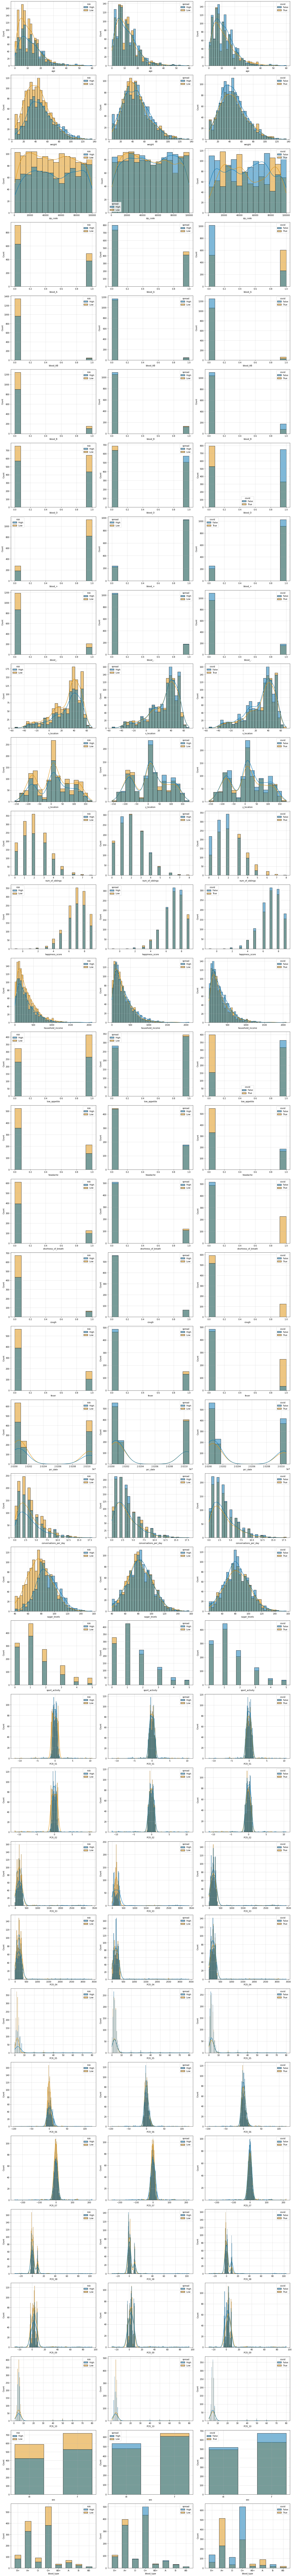

In [27]:
COL_NAME = [col for col in train_ohe.columns if col not in {'patient_id', 'sex', 'blood_type', 
                                                            'address', 'blood_nan', 'current_location', 
                                                            'job', 'risk', 'spread', 'covid'}]
OLD_COL_NAME=['sex', 'blood_type']
KDE_SET = {'weight', 'age', 'sugar_levels', 'conversations_per_day', 
           'PCR_01', 'PCR_02', 'PCR_03', 'PCR_04', 'PCR_05', 'PCR_06', 
           'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10', 'household_income',
           'x_location', 'y_location', 'zip_code', 'pcr_date'}

COLS = 3
ROWS = int(np.ceil((len(COL_NAME) + len(OLD_COL_NAME))*3 / COLS))
plt.figure(figsize=(20, 5 * ROWS))
i = 1
for column in COL_NAME:
  for val in ['risk', 'spread', 'covid']:
    plt.subplot(ROWS,COLS,i)
    sns.histplot(data=train_ohe, x=column, hue=val,
                 multiple='layer', kde=(column in KDE_SET),
                 palette='colorblind')
    plt.grid(alpha=0.5)
    i += 1

for column in OLD_COL_NAME:
  for val in ['risk', 'spread', 'covid']:
    plt.subplot(ROWS,COLS,i)
    sns.histplot(data=train, x=column, hue=val,
                 multiple='layer', kde=(column in KDE_SET),
                 palette='colorblind', shrink=0.6)
    plt.grid(alpha=0.5)
    i += 1
plt.tight_layout()

We want to analyze the histogram we got for sugar levels, so we will print 3 more histograms that will show the relative part for each bin in fractions, so it will be easier to understand.

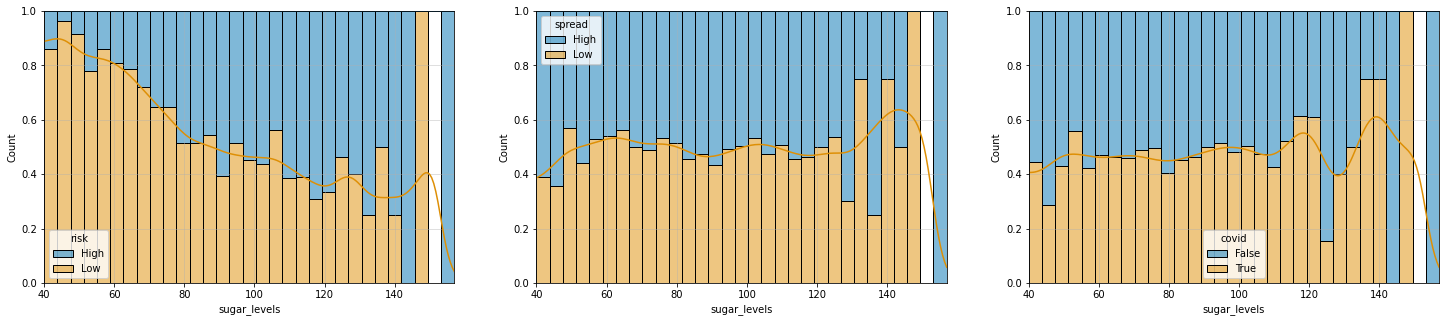

In [28]:
plt.figure(figsize=(25, 5))
i = 1
for val in ['risk', 'spread', 'covid']:
  plt.subplot(1,3,i)
  sns.histplot(data=train_ohe, x='sugar_levels', hue=val,
                multiple='fill', kde=True,
                palette='colorblind')
  plt.grid(alpha=0.5)
  i+=1

# <u>**Q10**</u>

Render a box plot of `household_income` by the risk label and add it to your report.</br>Are the outlier values informative, i.e., do outliers tend to one specific risk level over another? If so, how might we use this information to our advantage during prediction? If not, how would we clean the outliers so that they do not skew our models?

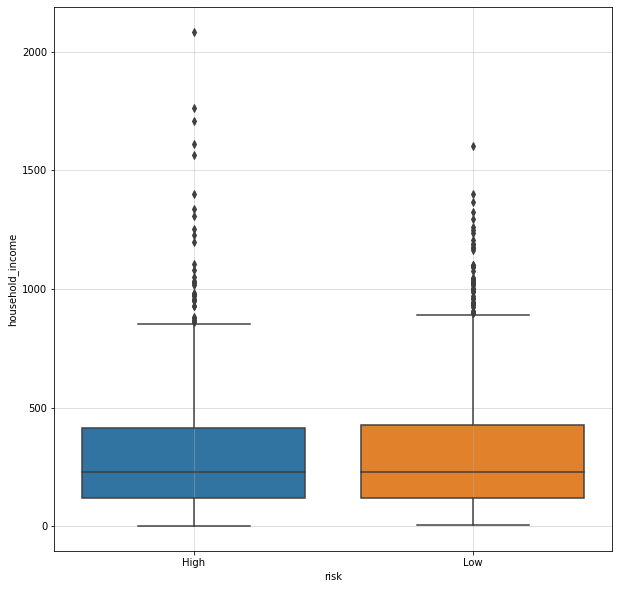

In [29]:
plt.figure(figsize=(10,10))
sns.boxplot(data=train_ohe, x='risk', y='household_income')
plt.grid(alpha=0.5)

Clean all outliers in the dataset. Do this by rendering a box plot for every pair of features that you find relevant for such an analysis (in your notebook).

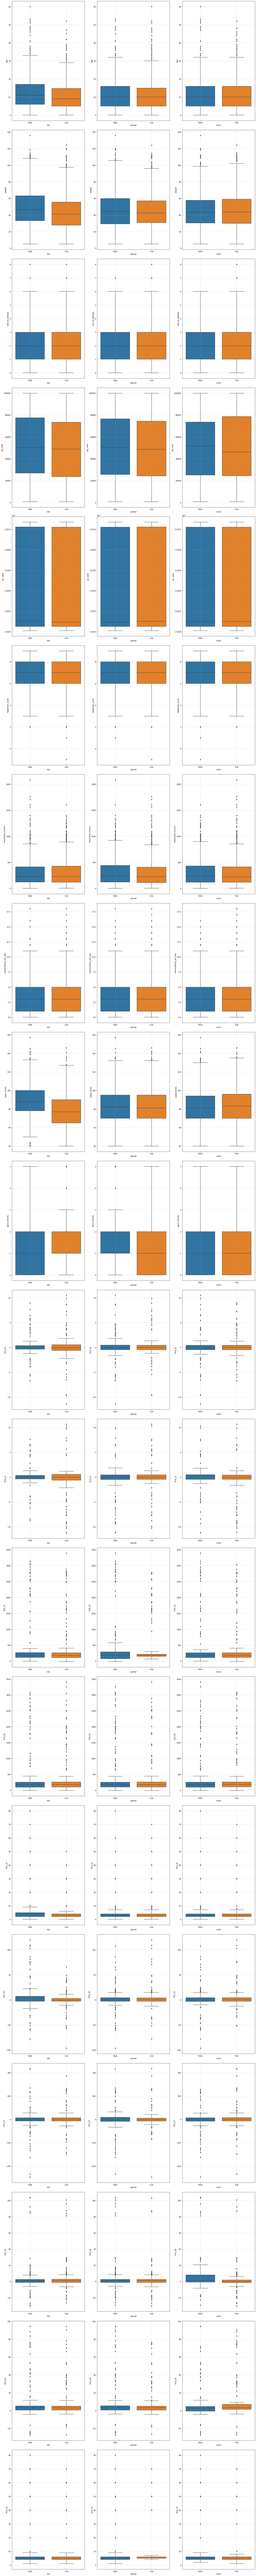

In [30]:
COLS_TO_PLOT =  ['age', 'weight', 'num_of_siblings', 'zip_code', 'pcr_date',
                 'happiness_score', 'household_income', 'conversations_per_day', 
                 'sugar_levels', 'sport_activity', 'PCR_01', 'PCR_02', 'PCR_03', 
                 'PCR_04', 'PCR_05', 'PCR_06', 'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10']
COLS = 3
ROWS = int(np.ceil((len(COLS_TO_PLOT))*3 / COLS))
plt.figure(figsize=(20, 10 * ROWS))
i = 1
for column in COLS_TO_PLOT:
  for val in ['risk', 'spread', 'covid']:
    plt.subplot(ROWS,COLS,i)
    sns.boxplot(data=train_ohe, x=val, y=column)
    plt.grid(alpha=0.5)
    i += 1
plt.tight_layout()

We will create two functions that will serve to extract rows that represent an outlier to a given feature: `z_score_filter`, `iqr_filter`

In [31]:
def z_score_filter(df, column):
  highest = df[column].mean() + 3*df[column].std()
  lowest = df[column].mean() - 3*df[column].std()
  return df[(df[column] > highest) | (df[column] < lowest)]

def iqr_filter(df, column):
  percentile25 = df[column].quantile(0.25)
  percentile75 = df[column].quantile(0.75)
  iqr = percentile75 - percentile25
  highest = percentile75 + 1.5*iqr
  lowest = percentile25 - 1.5*iqr
  return df[(df[column] > highest) | (df[column] < lowest)]

We will now display the histograms of the outliers for each relevant feature.

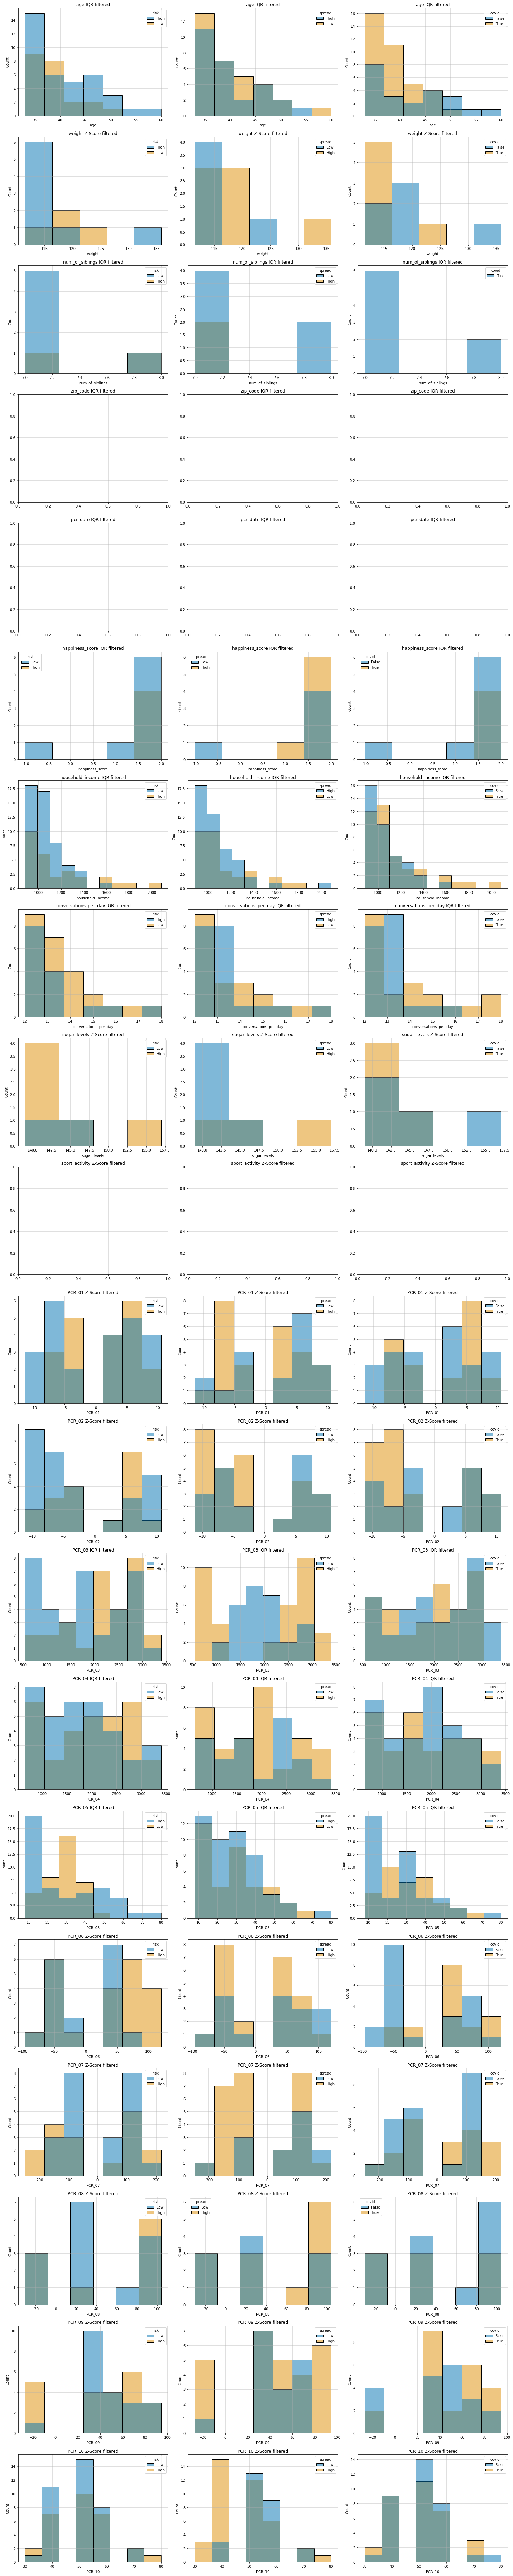

In [32]:
COLS = 3
ROWS = int(np.ceil((len(COLS_TO_PLOT))*3 / COLS))
plt.figure(figsize=(20, 5 * ROWS))

z_score_set = {
    'weight', 'sugar_levels', 'sport_activity', 
    'PCR_01', 'PCR_02', 'PCR_06', 
    'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10'
}
iqr_set = {
    'age', 'num_of_siblings', 'happiness_score', 
    'household_income', 'conversation_per_day', 
    'PCR_03', 'PCR_04', 'PCR_05'
}

i = 1
for col in COLS_TO_PLOT:
  filtered_df = z_score_filter(train_ohe, col) if col in z_score_set else iqr_filter(train_ohe, col)
  for val in ['risk', 'spread', 'covid']:
    plt.subplot(ROWS,COLS,i)
    hist = sns.histplot(data=filtered_df, x=col, hue=val,
                 multiple='layer',
                 palette='colorblind')
    hist.set(title = col + (' Z-Score filtered' if col in z_score_set else ' IQR filtered'))
    plt.grid(alpha=0.5)
    i += 1

plt.tight_layout()

We can also look at all the pairs of relevant features that we suspect have a certain correlation between them for our analysis.

In [33]:
# FEATURES_TO_PLOT = ['age', 'weight', 'num_of_siblings', 'conversations_per_day',
#                     'sugar_levels', 'pcr_date', 'PCR_01', 'PCR_02', 'PCR_03', 'PCR_04',
#                     'PCR_05', 'PCR_06', 'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10']
# sns.pairplot(train_ohe[FEATURES_TO_PLOT + ['risk']], hue='risk')

In [34]:
# sns.pairplot(train_ohe[FEATURES_TO_PLOT + ['spread']], hue='spread')

In [35]:
# sns.pairplot(train_ohe[FEATURES_TO_PLOT + ['covid']], hue='covid')

With the information we now have in hand we will decide which feature we want to clean of outliers and then clean it automatically using the two functions defined above.

In [36]:
def __z_score_clean(df, column, lowest, highest):
  if lowest is None:
    lowest = df[column].mean() - 3*df[column].std()
  if highest is None:
    highest = df[column].mean() + 3*df[column].std()
  df[column] = np.where(
      df[column] > highest,
      highest,
      np.where(
          df[column] < lowest,
          lowest,
          df[column]
      )
  )
  

def __iqr_clean(df, column, lowest, highest):
  percentile25 = df[column].quantile(0.25)
  percentile75 = df[column].quantile(0.75)
  iqr = percentile75 - percentile25
  if lowest is None:
    lowest = percentile25 - 1.5*iqr
  if highest is None:
    highest = percentile75 + 1.5*iqr
  df[column] = np.where(
      df[column] > highest,
      highest,
      np.where(
          df[column] < lowest,
          lowest,
          df[column]
      )
  )
  
def clean_outliers(df, column, filter, lowest=None, highest=None):
  if filter.lower() == 'z_score':
    __z_score_clean(df, column, lowest, highest)
  elif filter.lower() == 'iqr':
    __iqr_clean(df, column, lowest, highest)
  else:
    raise Exception("Method not supported.")

We would like to check what is the percentage of the outliers for each feature according to each filtering method.

In [37]:
features_to_clean = ['age', 'weight', 'household_income',
                     'conversations_per_day', 'PCR_01', 'PCR_02', 'PCR_03', 
                     'PCR_04', 'PCR_05', 'PCR_06', 'PCR_07', 
                     'PCR_08', 'PCR_09', 'PCR_10'] # clean 'happiness_score' manually
# We do not clean: num_of_siblings, sugar_level, sport_activity

original_len = train_ohe.shape[0]
for feature in features_to_clean:
  z_filtered_df, iqr_filtered_df = z_score_filter(train_ohe, feature), iqr_filter(train_ohe, feature)
  print(f'The percentage of outliers of {feature} according to z-score is {z_filtered_df.shape[0]/original_len*100:.3}%, and according to IQR filtering it is {iqr_filtered_df.shape[0]/original_len*100:.3}%')

The percentage of outliers of age according to z-score is 1.46%, and according to IQR filtering it is 2.46%
The percentage of outliers of weight according to z-score is 0.5%, and according to IQR filtering it is 1.33%
The percentage of outliers of household_income according to z-score is 1.33%, and according to IQR filtering it is 3.29%
The percentage of outliers of conversations_per_day according to z-score is 1.67%, and according to IQR filtering it is 1.67%
The percentage of outliers of PCR_01 according to z-score is 1.83%, and according to IQR filtering it is 2.46%
The percentage of outliers of PCR_02 according to z-score is 1.96%, and according to IQR filtering it is 2.21%
The percentage of outliers of PCR_03 according to z-score is 2.04%, and according to IQR filtering it is 2.71%
The percentage of outliers of PCR_04 according to z-score is 1.96%, and according to IQR filtering it is 2.62%
The percentage of outliers of PCR_05 according to z-score is 1.88%, and according to IQR fi

In [38]:
clean_lock = False

In [39]:
if not clean_lock:
  for feature in features_to_clean:
    clean_outliers(train_ohe, feature, 'z_score' if feature in z_score_set else 'iqr')

  clean_outliers(train_ohe, 'happiness_score', 'z_score', lowest=1)
  clean_lock = True

We can check the state of our outliers again by printing all the boxplots from before once more:

In [40]:
'''
COLS_TO_PLOT =  ['age', 'weight', 'num_of_siblings', 
                 'happiness_score', 'household_income', 'conversations_per_day', 
                 'sugar_levels', 'sport_activity', 'PCR_01', 'PCR_02', 'PCR_03', 
                 'PCR_04', 'PCR_05', 'PCR_06', 'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10']
COLS = 3
ROWS = int(np.ceil((len(COLS_TO_PLOT))*3 / COLS))
plt.figure(figsize=(20, 10 * ROWS))
i = 1
for column in COLS_TO_PLOT:
  for val in ['risk', 'spread', 'covid']:
    plt.subplot(ROWS,COLS,i)
    sns.boxplot(data=train_ohe, x=val, y=column)
    plt.grid(alpha=0.5)
    i += 1
plt.tight_layout()
'''

"\nCOLS_TO_PLOT =  ['age', 'weight', 'num_of_siblings', \n                 'happiness_score', 'household_income', 'conversations_per_day', \n                 'sugar_levels', 'sport_activity', 'PCR_01', 'PCR_02', 'PCR_03', \n                 'PCR_04', 'PCR_05', 'PCR_06', 'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10']\nCOLS = 3\nROWS = int(np.ceil((len(COLS_TO_PLOT))*3 / COLS))\nplt.figure(figsize=(20, 10 * ROWS))\ni = 1\nfor column in COLS_TO_PLOT:\n  for val in ['risk', 'spread', 'covid']:\n    plt.subplot(ROWS,COLS,i)\n    sns.boxplot(data=train_ohe, x=val, y=column)\n    plt.grid(alpha=0.5)\n    i += 1\nplt.tight_layout()\n"

We can also take a look at the pair-plot matrix again to see the (semi) cleaned data and notice that in comparison to before, there is less noise in the data:

In [41]:
# FEATURES_TO_PLOT = ['age', 'weight', 'num_of_siblings', 'conversations_per_day', 'happiness_score', 'household_income', 'zip_code',
#                     'sugar_levels', 'cough', 'shortness_of_breath', 'low_appetite', 'headache', 'fever', 'sport_activity', 'pcr_date', 'PCR_01', 'PCR_02', 'PCR_03', 'PCR_04',
#                     'PCR_05', 'PCR_06', 'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10']
# sns.pairplot(train_ohe[FEATURES_TO_PLOT + ['risk']], hue='risk')

In [42]:
# sns.pairplot(train_ohe[FEATURES_TO_PLOT + ['spread']], hue='spread')

In [43]:
# sns.pairplot(train_ohe[FEATURES_TO_PLOT + ['covid']], hue='covid')

# <u>**Q16**</u>

Analyze `num_of_siblings` and perform imputation on this feature (do not use “missing category”). What imputation technique did you choose and why do you think it is suitable in this case?

### ***Solution***:

We will use the median imputation technique to fill the missing data in the `num_of_siblings` feature. (Reason explained in the report)

In [44]:
locked = False

In [45]:
# apply the transformation to the train set:
if not locked:
  train_ohe.num_of_siblings = train_ohe.num_of_siblings.fillna(train_ohe.num_of_siblings.median())
  locked = True

print(f'num_of_siblings {"no longer" if all(train_ohe.num_of_siblings.notnull()) else "still"} has NaN values.')

num_of_siblings no longer has NaN values.


# <u>**Q17**</u>

Impute all missing values in the dataset (do not use “missing category”). In your report, show the univariate analysis visualization as in **(Q9)** before and after imputation for the features `sex` and `weight`.

### ***Solution***:

Before imputing any data we would like to first check the percentage of missing data for each feature that we would like to impute.

In [46]:
FEATURES_TO_IMPUTE = ['weight', 'age', 'sex', 'zip_code', 'x_location', 'y_location', 
                      'num_of_siblings', 'happiness_score', 'household_income', 
                      'fever', 'low_appetite', 'shortness_of_breath', 'cough', 
                      'headache', 'pcr_date', 'conversations_per_day', 'PCR_10',
                      'sugar_levels', 'sport_activity', 'PCR_01', 'PCR_02', 
                      'PCR_03', 'PCR_04', 'PCR_06', 'PCR_05', 'PCR_07', 
                      'PCR_08', 'PCR_09']
for feature in FEATURES_TO_IMPUTE:
  nan_series = train_ohe[feature].isnull()
  print(f'The percentage of missing data for "{feature}" is {sum(nan_series)/len(nan_series)*100:.3}%')
print(f'The percentage of missing data for "blood_type" is {sum(train_ohe.blood_nan)/len(train_ohe.blood_nan)*100:.3}%')

The percentage of missing data for "weight" is 4.67%
The percentage of missing data for "age" is 5.75%
The percentage of missing data for "sex" is 5.79%
The percentage of missing data for "zip_code" is 4.88%
The percentage of missing data for "x_location" is 4.75%
The percentage of missing data for "y_location" is 4.75%
The percentage of missing data for "num_of_siblings" is 0.0%
The percentage of missing data for "happiness_score" is 4.75%
The percentage of missing data for "household_income" is 5.25%
The percentage of missing data for "fever" is 48.7%
The percentage of missing data for "low_appetite" is 48.7%
The percentage of missing data for "shortness_of_breath" is 48.7%
The percentage of missing data for "cough" is 48.7%
The percentage of missing data for "headache" is 48.7%
The percentage of missing data for "pcr_date" is 5.12%
The percentage of missing data for "conversations_per_day" is 4.67%
The percentage of missing data for "PCR_10" is 4.88%
The percentage of missing data f

According to our understanding of the nature of each feature, and the percentage of missing data for each one of the feature we will assign a data imputation strategy for each feature.

Also, since we noticed that `num_of_siblings` has no missing data, we will simply remove it from the above list.

In [47]:
remove_locked = False

In [48]:
if not remove_locked:
  FEATURES_TO_IMPUTE.remove('num_of_siblings')
  remove_locked = True

strat_dict = {
    'age': 'bivariate_median', # with weight
    'sex': 'random',
    'weight': 'median',
    'zip_code': 'median',
    'x_location': 'median',
    'y_location': 'median',
    'happiness_score': 'median',
    'household_income': 'bivariate_median', # with age
    'fever': 'arbitrary',
    'low_appetite': 'arbitrary',
    'shortness_of_breath': 'arbitrary',
    'cough': 'arbitrary',
    'headache': 'arbitrary',
    'pcr_date': 'median',
    'conversations_per_day': 'median',
    'sugar_levels': 'bivariate_median', # with weight
    'sport_activity': 'median',
    'PCR_01': 'median',
    'PCR_02': 'bivariate_median', # with age
    'PCR_03': 'median',
    'PCR_04': 'median',
    'PCR_05': 'bivariate_median', # with PCR_06
    'PCR_06': 'bivariate_median', # with PCR_10
    'PCR_07': 'bivariate_median', # with PCR_10
    'PCR_08': 'bivariate_median', # with PCR_04
    'PCR_09': 'bivariate_median', # with PCR_08
    'PCR_10': 'median',
}
# We will also need to impute the blood type OHE vectors manually.

We will create functions to handle the different types of data imputations.

In [49]:
import random


class DataImputer:
  def __init__(self, dataframe, features, strategy_dict, instructions_dict = dict(), missing_marker = np.NaN):
    self.strats = strategy_dict
    self.instructions_dict = instructions_dict
    self.df = dataframe.copy()
    self.missing_marker = missing_marker
    self.to_impute = features
    return
  
  def __median_impute(self, feature):
    median = self.df[feature].median()
    self.df[feature] = self.df[feature].fillna(median)
    return

  def __random(self, feature):
    items = list(self.df[feature].value_counts().index)
    for i in range(len(self.df[feature])):
      if self.df.loc[i, feature] is self.missing_marker:
        self.df.loc[i, feature] = random.choice(items)
    return
  
  def __arbitrary(self, feature, constant):
    self.df[feature] = self.df[feature].fillna(constant)
    return
  
  def __frequent(self, feature):
    frequent_category = self.df[feature].value_counts().index[0]
    self.df[feature] = self.df[feature].fillna(frequent_category)
    return

  def __bivariate_median(self, feature, secondary, init_bin_size = 0):
    for i in range(self.df.shape[0]):
      if np.isnan(self.df.loc[i, feature]):
        tmp_secondary = self.df[secondary][i]
        tmp_bin_size = init_bin_size
        filtered_by_secondary = self.df[(self.df[secondary] >= tmp_secondary - tmp_bin_size) & (self.df[secondary] <= tmp_secondary + tmp_bin_size)]
        while filtered_by_secondary[pd.notna(filtered_by_secondary[feature])].shape[0] == 0:
          tmp_bin_size += 1
          filtered_by_secondary = self.df[(self.df[secondary] >= tmp_secondary - tmp_bin_size) & (self.df[secondary] <= tmp_secondary + tmp_bin_size)]
        bivariate_median = filtered_by_secondary[feature].median()
        self.df.loc[i, feature] = bivariate_median
    return

  def impute_data(self):
    for feature in self.to_impute:
      if self.strats[feature] == 'median':
        self.__median_impute(feature)
      elif self.strats[feature] == 'random':
        self.__random(feature)
      elif self.strats[feature] == 'arbitrary':
        self.__arbitrary(feature, self.instructions_dict[feature])
      elif self.strats[feature] == 'frequent':
        self.__frequent(feature)
      elif self.strats[feature] == 'bivariate_median' or self.strats[feature] == 'bivariate':
        self.__bivariate_median(feature, self.instructions_dict[feature][0], self.instructions_dict[feature][1])
    return self.df
  
  @staticmethod
  def impute_blood_ohe(main_df, df_to_impute):
    frequent_blood = main_df.blood_type.value_counts().index[0]
    regex = r'([ABO]{1,2})([+-])'
    match = re.search(regex, frequent_blood)
    blood_label = 'blood_' + match.group(1)
    rh_label = 'blood_' + match.group(2)
    for i in range(df_to_impute.shape[0]):
      if df_to_impute.loc[i, 'blood_nan'] == 1:
        df_to_impute.loc[i, blood_label] = 1
        df_to_impute.loc[i, rh_label] = 1
    df_to_impute.drop(columns='blood_nan', inplace=True)
    return

In [50]:
instructions = {
    'age': ('weight', 5),
    'household_income': ('age', 2),
    'fever': 0,
    'low_appetite': 0,
    'shortness_of_breath': 0,
    'cough': 0,
    'headache': 0,
    'sugar_levels': ('weight', 5),
    'PCR_02': ('age', 2),
    'PCR_05': ('PCR_06', 1), 
    'PCR_06': ('PCR_10', 0.5), 
    'PCR_07': ('PCR_10', 0.5), 
    'PCR_08': ('PCR_04', 15),
    'PCR_09': ('PCR_08', 1), 
}

di = DataImputer(train_ohe, FEATURES_TO_IMPUTE, strat_dict, instructions)
train_full = di.impute_data()
print(f'Variables imputed:\n{FEATURES_TO_IMPUTE}\n')


Variables imputed:
['weight', 'age', 'sex', 'zip_code', 'x_location', 'y_location', 'happiness_score', 'household_income', 'fever', 'low_appetite', 'shortness_of_breath', 'cough', 'headache', 'pcr_date', 'conversations_per_day', 'PCR_10', 'sugar_levels', 'sport_activity', 'PCR_01', 'PCR_02', 'PCR_03', 'PCR_04', 'PCR_06', 'PCR_05', 'PCR_07', 'PCR_08', 'PCR_09']



Impute the missing blood type values according to the `blood_nan` OHE variable:

In [51]:
impute_locked = False

In [52]:
if not impute_locked:
  DataImputer.impute_blood_ohe(train, train_full)
  impute_locked = True

Finally, visualize the data:

In [53]:
train_full.head(10)

patient_id   age sex  weight  zip_code  ...    PCR_09  PCR_10  risk  spread  covid
0        8658   3.0   1     5.0   28385.0  ...  3.422560     5.0  High    High   True
1        7859  25.0   1    79.2   60200.0  ...  2.672542     6.0   Low    High   True
2        9655  11.0  -1    43.4   36370.0  ... -2.358551     4.0   Low     Low  False
3        2802   6.0   1    44.3   43423.0  ... -2.378149     6.0   Low    High   True
4       14905  11.0   1    50.8   92565.0  ...  3.400644     5.0  High    High  False
5       10121  26.0  -1    63.4   94431.0  ...  0.708362     7.0   Low    High  False
6       13143   7.0   1    41.6   95373.0  ...  3.766927     5.0  High     Low   True
7        3596   9.0   1    74.3   47269.0  ...  2.347306     6.0   Low    High   True
8        7601  23.0  -1    71.0   91292.0  ...  1.602986     6.0  High     Low  False
9        5314   1.0  -1     7.3   18860.0  ...  1.741216     6.0   Low    High   True

[10 rows x 39 columns]

We shall now demonstrate the univariate analysis visualization as in **(Q9)** before and after the imputation for the features `sex` and `weight`.
***NOTE:*** In the `sex` histograms the value `1` refers to Male, and `-1` refers to Female.

Before:



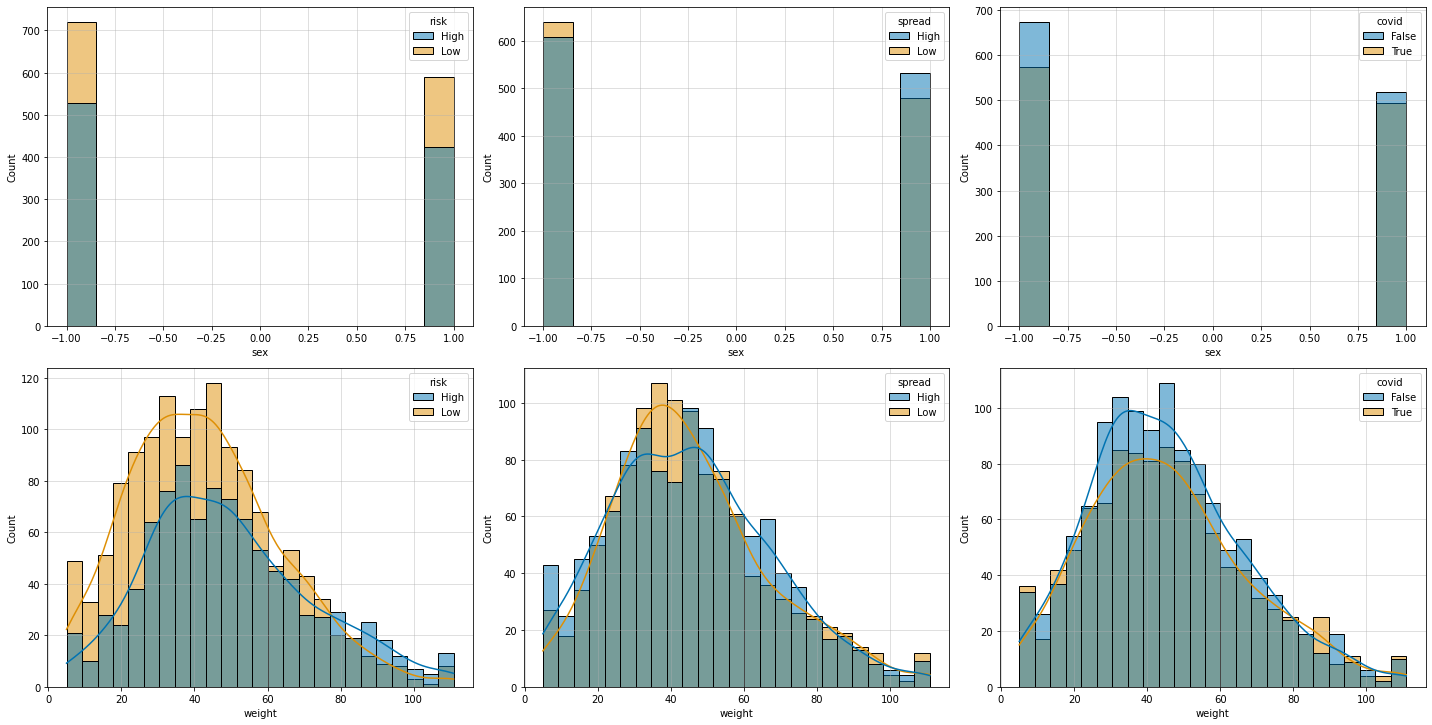

In [54]:
COL_NAME =  ['sex', 'weight']
COLS = 3
ROWS = int(np.ceil((len(COLS_TO_PLOT))*3 / COLS))

print('Before:\n')
plt.figure(figsize=(20, 5 * ROWS))
i = 1
for column in COL_NAME:
  for val in ['risk', 'spread', 'covid']:
    plt.subplot(ROWS,COLS,i)
    sns.histplot(data=train_ohe, x=column, hue=val,
                 multiple='layer', kde=(column in KDE_SET),
                 palette='colorblind')
    plt.grid(alpha=0.5)
    i += 1
plt.tight_layout()

After:



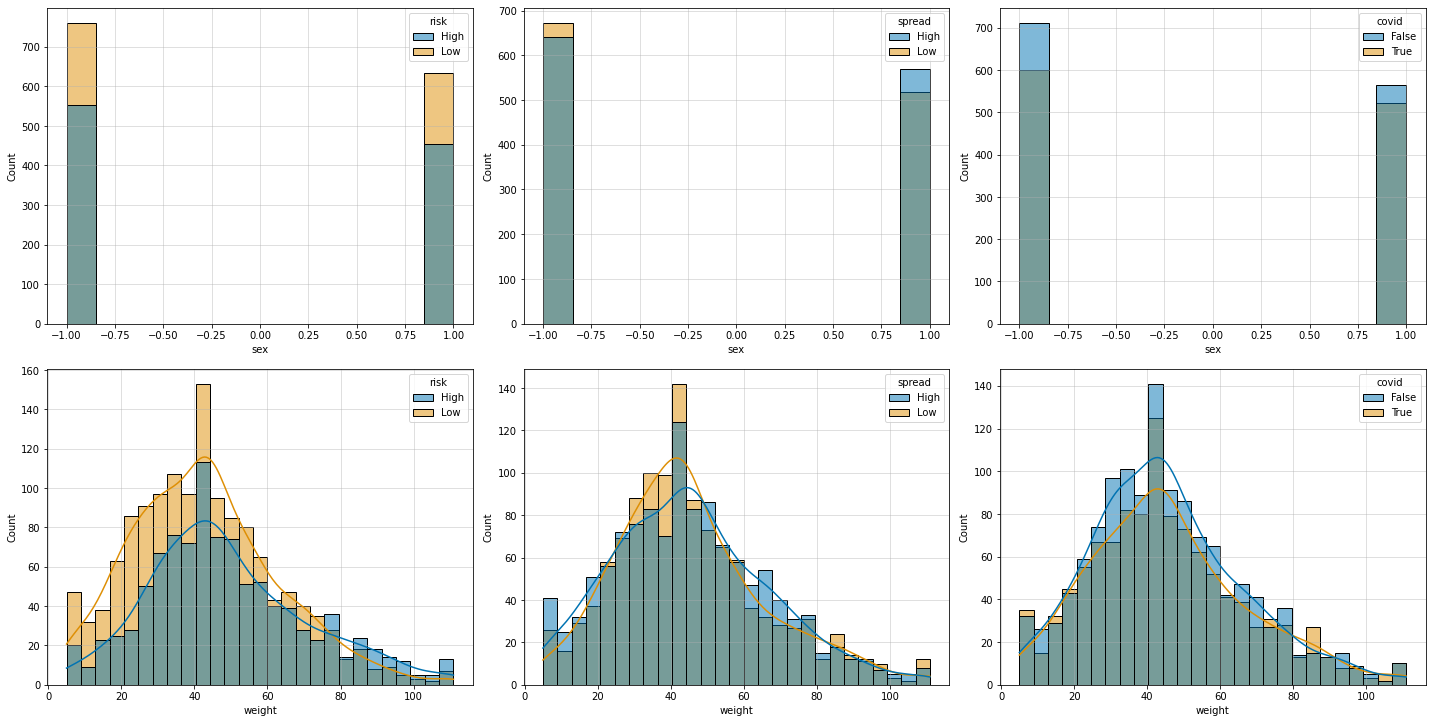

In [55]:
COL_NAME =  ['sex', 'weight']
COLS = 3
ROWS = int(np.ceil((len(COLS_TO_PLOT))*3 / COLS))

print('After:\n')
plt.figure(figsize=(20, 5 * ROWS))
i = 1
for column in COL_NAME:
  for val in ['risk', 'spread', 'covid']:
    plt.subplot(ROWS,COLS,i)
    sns.histplot(data=train_full, x=column, hue=val,
                 multiple='layer', kde=(column in KDE_SET),
                 palette='colorblind')
    plt.grid(alpha=0.5)
    i += 1
plt.tight_layout()

# <u>**Q19**</u>

Add a correlation matrix, like we saw in tutorial 01, to your report and observe the row for `PCR_10`. According to **this row** only, are there any redundant features in our dataset? Explain.

### ***Solution***:

We will create and display the correlation matrix.

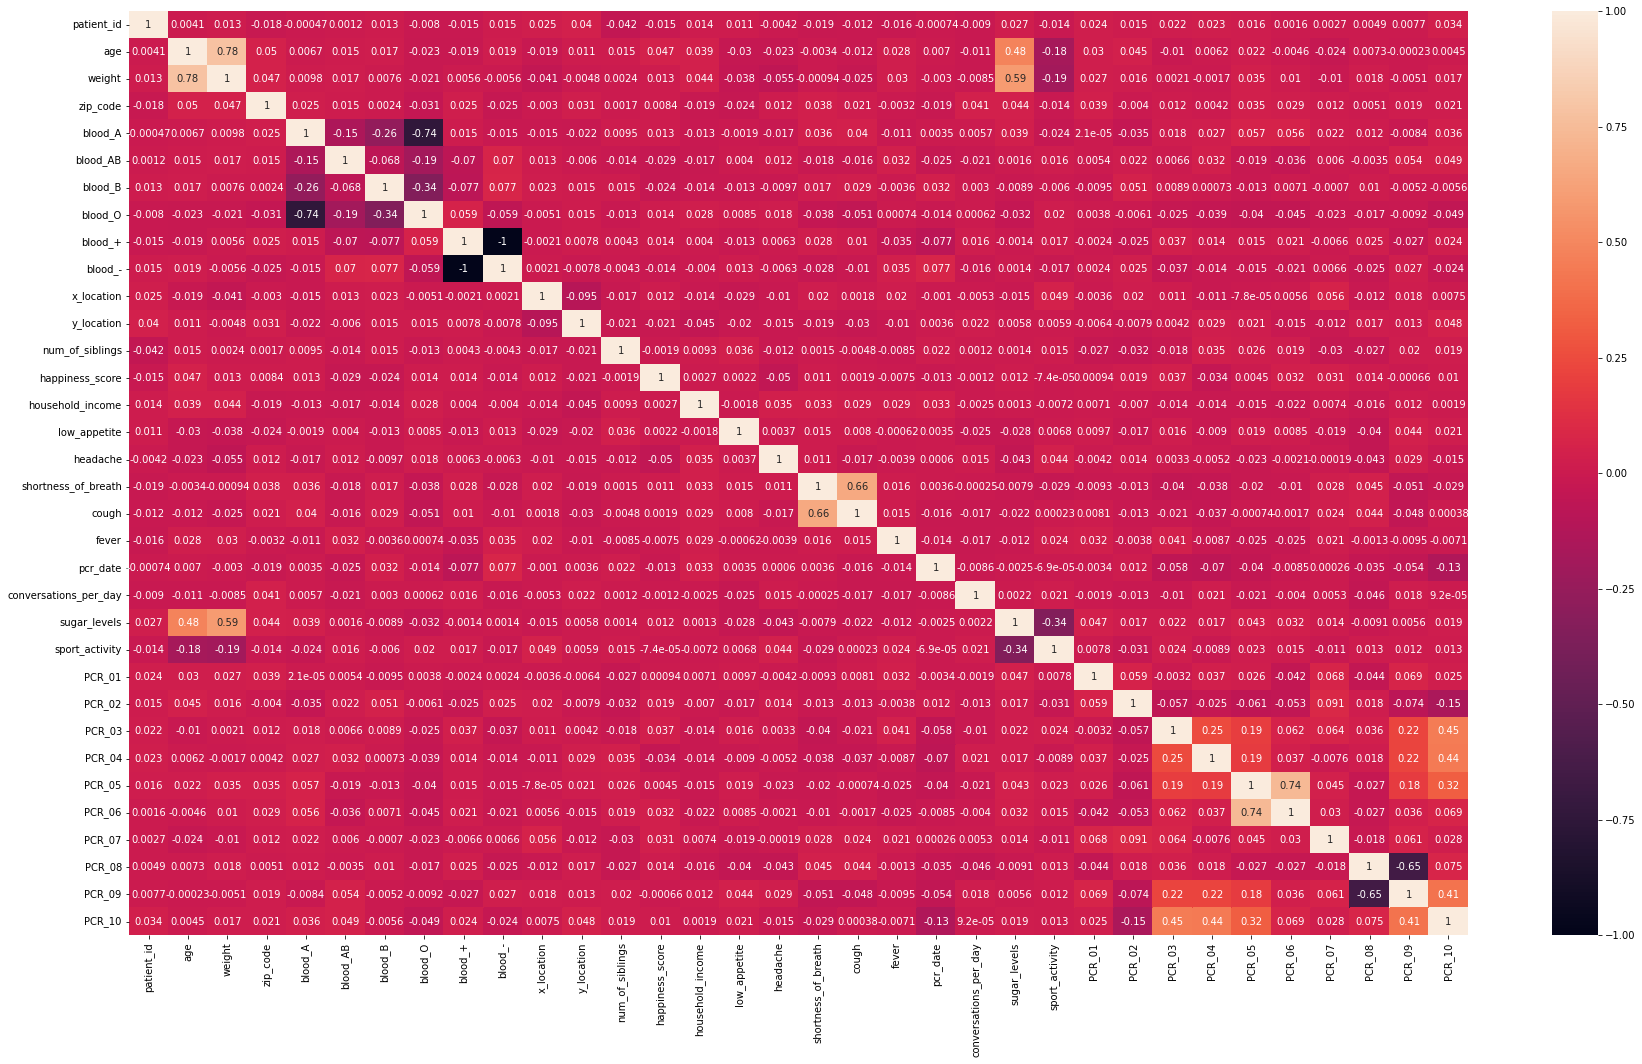

In [92]:
corrMatrix = train_full[[x for x in train_full.columns if x not in set(['risk', 'spread', 'covid'])]].corr()
plt.figure(figsize=(30, 17))
sns.heatmap(corrMatrix, annot=True)
plt.show()

# <u>**Q21**</u>

Render a jointplot (like we saw in tutorial 01) between `PCR_01` and `PCR_02` where each point is colored according to its `“risk”` label (meaning that 2 points in the plot with different `“risk”` labels should be colored differently). Are both features necessary for classifying `“risk”`? Why or why not.

### ***Solution***:

We will create and display the jointplot.

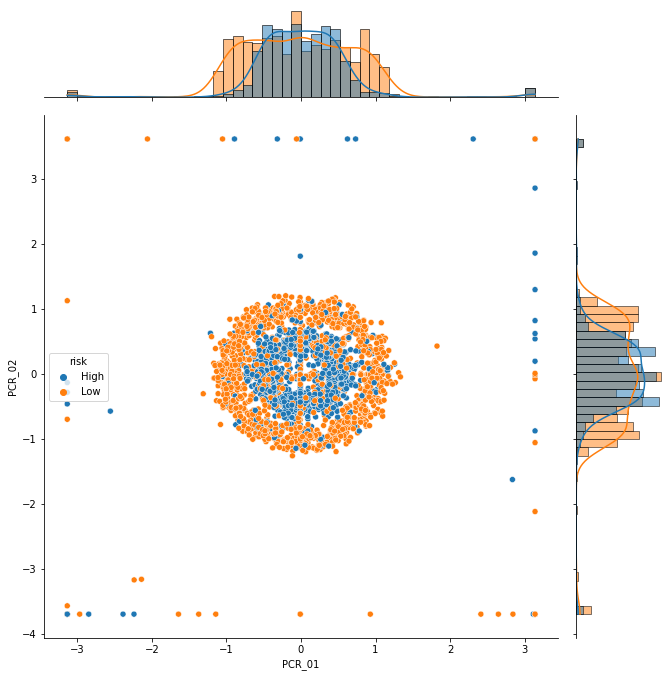

In [57]:
g = sns.JointGrid(data=train_full, x='PCR_01', y='PCR_02', hue='risk')
g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.histplot, kde=True)
g.fig.set_size_inches(10,10)

# <u>**Q22**</u>

Here we will print additional graphs that we find useful for our analysis for this question.

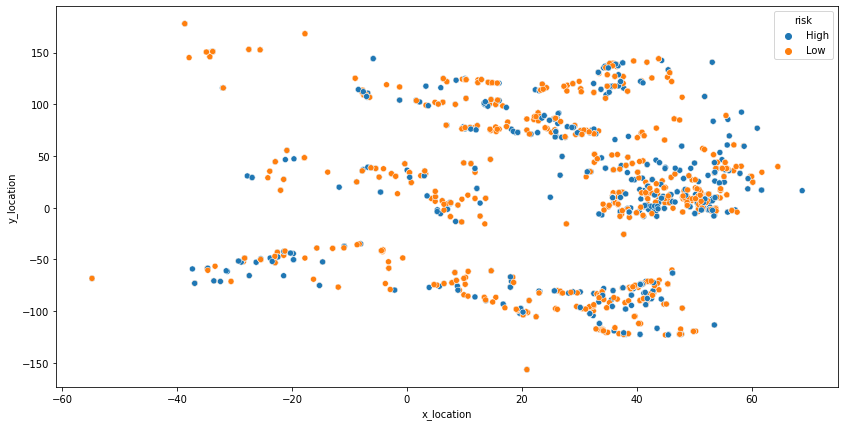

In [69]:
plt.figure(figsize=(14, 7))
sns.scatterplot(data=train_full, x='x_location', y='y_location', hue='risk')

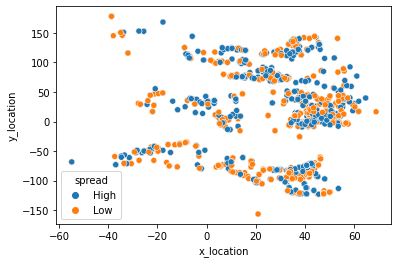

In [59]:
sns.scatterplot(data=train_full, x='x_location', y='y_location', hue='spread')

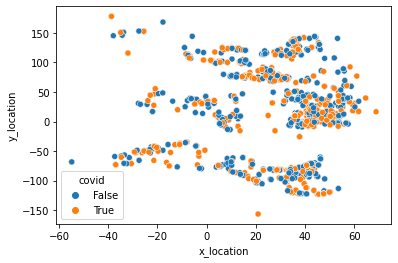

In [60]:

sns.scatterplot(data=train_full, x='x_location', y='y_location', hue='covid')

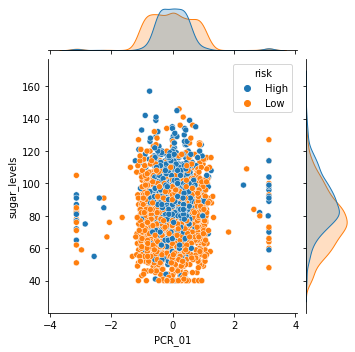

In [61]:
sns.jointplot(data=train_full, x="PCR_01", y="sugar_levels", hue="risk", kind="scatter", height=5)

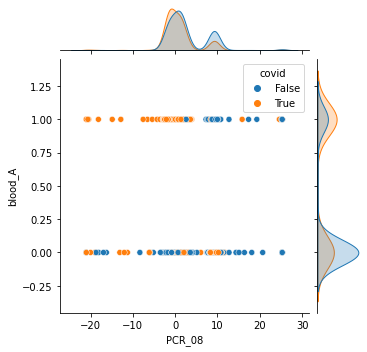

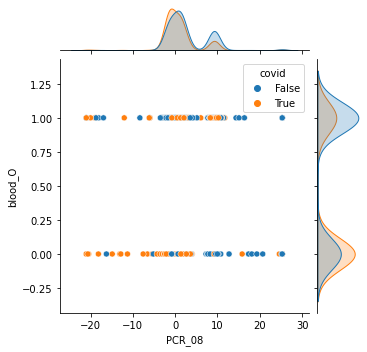

In [62]:
SIZE_SCALE = 5
sns.jointplot(data=train_full, x="PCR_08", y="blood_A", hue="covid", kind="scatter", height=SIZE_SCALE)
sns.jointplot(data=train_full, x="PCR_08", y="blood_O", hue="covid", kind="scatter", height=SIZE_SCALE)

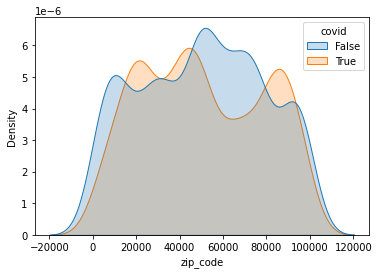

In [71]:
sns.kdeplot(data=train_full, x="zip_code", hue="covid", fill=True)

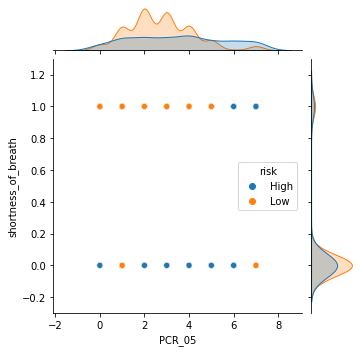

In [72]:
SIZE_SCALE = 5
sns.jointplot(data=train_full, x="PCR_05", y="shortness_of_breath", hue="risk", kind="scatter", height=SIZE_SCALE)

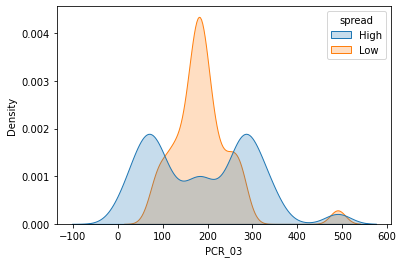

In [80]:
sns.kdeplot(data=train_full, x="PCR_03", hue="spread", fill=True)

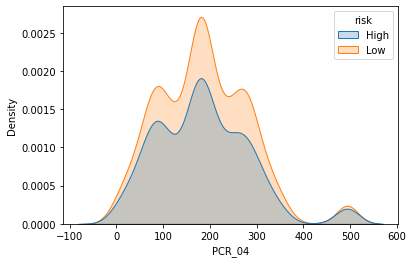

In [83]:
sns.kdeplot(data=train_full, x="PCR_04", hue="risk", fill=True)

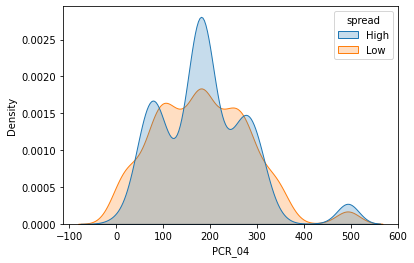

In [84]:
sns.kdeplot(data=train_full, x="PCR_04", hue="spread", fill=True)

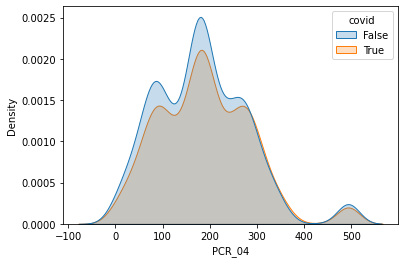

In [85]:

sns.kdeplot(data=train_full, x="PCR_04", hue="covid", fill=True)

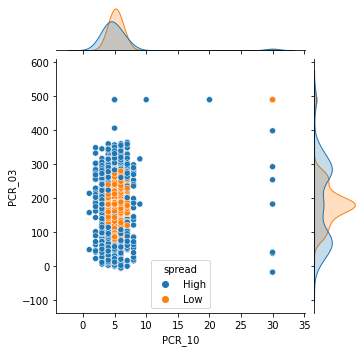

In [86]:
SIZE_SCALE = 5
sns.jointplot(data=train_full, x="PCR_10", y="PCR_03", hue="spread", kind="scatter", height=SIZE_SCALE)

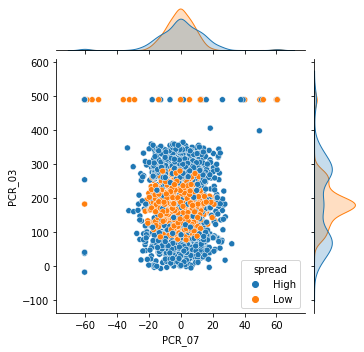

In [87]:
SIZE_SCALE = 5
sns.jointplot(data=train_full, x="PCR_07", y="PCR_03", hue="spread", kind="scatter", height=SIZE_SCALE)

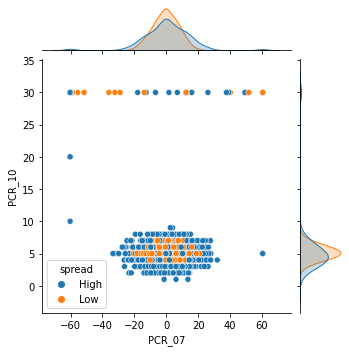

In [88]:
SIZE_SCALE = 5
sns.jointplot(data=train_full, x="PCR_07", y="PCR_10", hue="spread", kind="scatter", height=SIZE_SCALE)

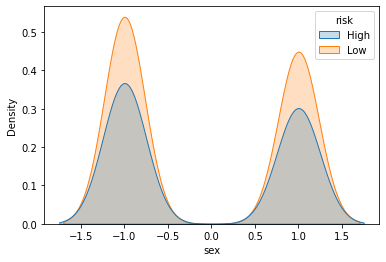

In [97]:
sns.kdeplot(data=train_full, x="sex", hue="risk", fill=True)

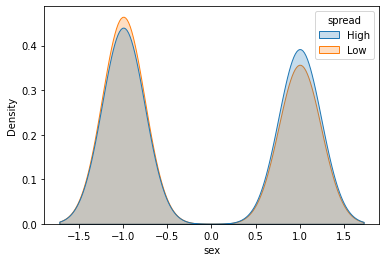

In [98]:
sns.kdeplot(data=train_full, x="sex", hue="spread", fill=True)

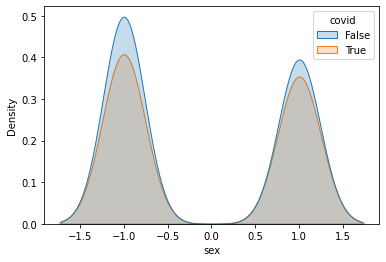

In [99]:
sns.kdeplot(data=train_full, x="sex", hue="covid", fill=True)